## Codebase for bank marketing dataset classification using stacking techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from dataset import get_data

df = get_data()
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Variation 1 : DT, LR, AdaBoost

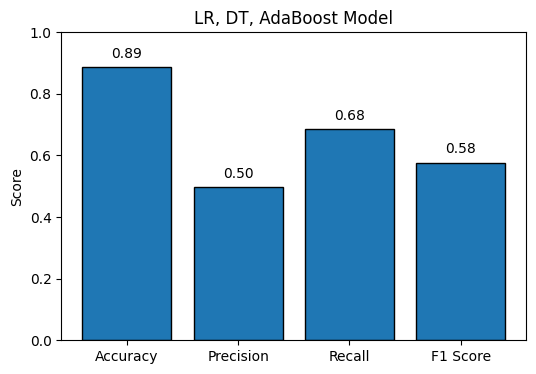

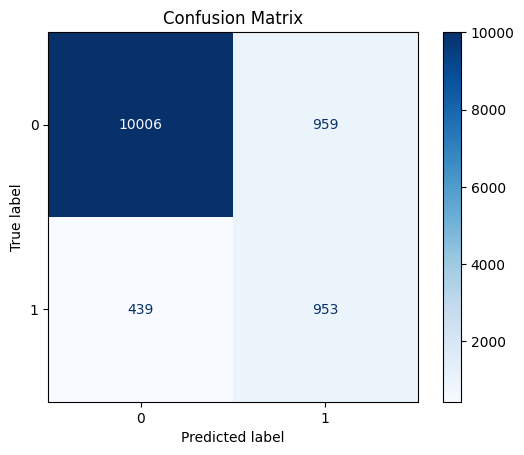

Accuracy: 0.8869
Recall: 0.6846
Precision: 0.4984
F1 Score: 0.5769
Confusion Matrix: TN=10006, FP=959, FN=439, TP=953


In [6]:
from preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

#Base model init
base = [
    ('lr', LogisticRegression(max_iter=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
]

#Stacking classifier
stack = StackingClassifier(
    estimators=base,
    final_estimator=LogisticRegression(max_iter=100, random_state=42),
    cv=cv_5fold(),
    n_jobs=-1,
)

stack.fit(X_resampled, y_resampled)

y_pred = stack.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}

plt.figure(figsize=(6,4))
bars = plt.bar(metrics.keys(), metrics.values(), edgecolor='black')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('LR, DT, AdaBoost Model')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Variation 2: RF, GB, SVM

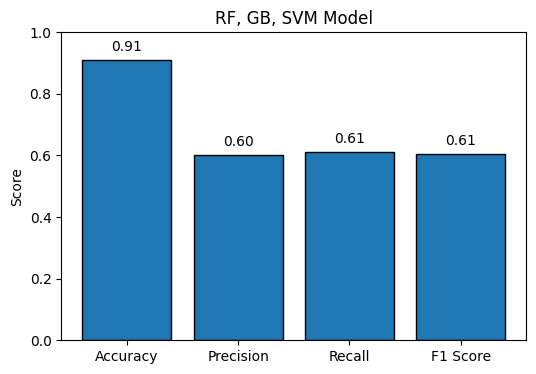

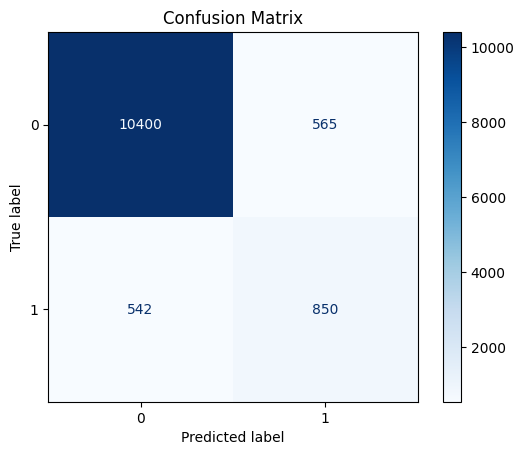

Accuracy: 0.9104
Recall: 0.6106
Precision: 0.6007
F1 Score: 0.6056
Confusion Matrix: TN=10400, FP=565, FN=542, TP=850


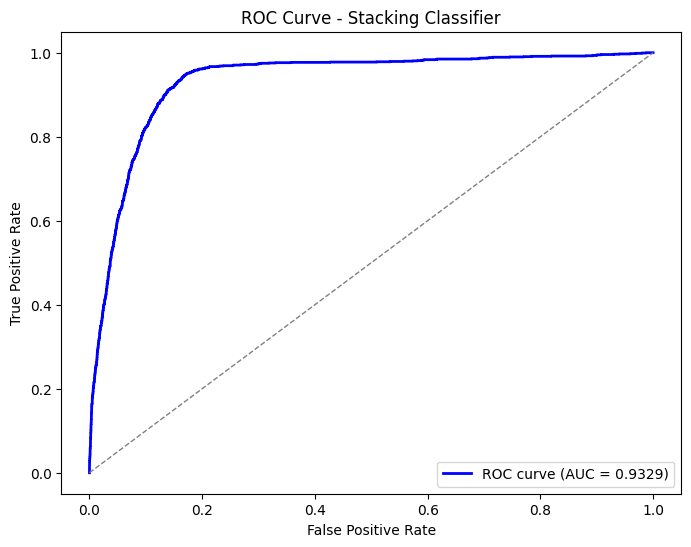

In [12]:
from preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

#Base model init
base = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svm', SVC(random_state=42))
]

#Stacking classifier
stack = StackingClassifier(
    estimators=base,
    final_estimator=LogisticRegression(max_iter=100, random_state=42),
    cv=cv_5fold(),
    n_jobs=-1,
)

stack.fit(X_resampled, y_resampled)

y_pred = stack.predict(X_test)
y_pred_proba = stack.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}

plt.figure(figsize=(6,4))
bars = plt.bar(metrics.keys(), metrics.values(), edgecolor='black')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('RF, GB, SVM Model')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc="lower right")
plt.show()

Variant 3: AdaBoost, SVM, DT

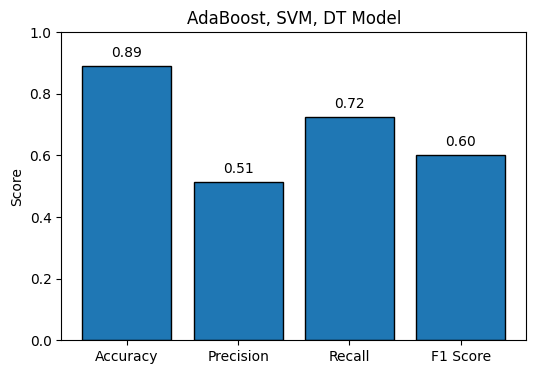

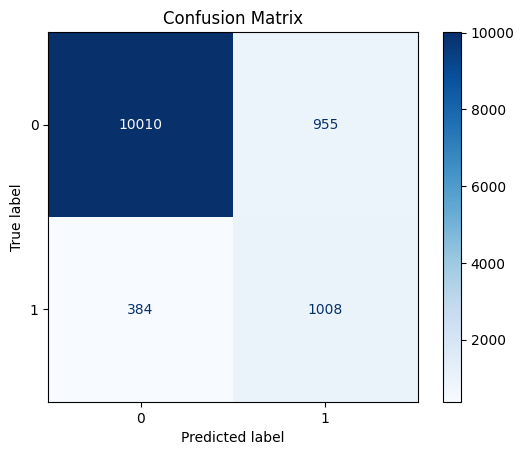

Accuracy: 0.8916
Recall: 0.7241
Precision: 0.5135
F1 Score: 0.6009
Confusion Matrix: TN=10010, FP=955, FN=384, TP=1008


In [9]:
from preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

#Base model init
base = [
    ('ada', AdaBoostClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42))
]

#Stacking classifier
stack = StackingClassifier(
    estimators=base,
    final_estimator=LogisticRegression(max_iter=100, random_state=42),
    cv=cv_5fold(),
    n_jobs=-1,
)

stack.fit(X_resampled, y_resampled)

y_pred = stack.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}

plt.figure(figsize=(6,4))
bars = plt.bar(metrics.keys(), metrics.values(), edgecolor='black')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('AdaBoost, SVM, DT Model')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Optimize Best Variant using GridSearchCV for each learner

In [13]:
#Random Forest Optimization
from preprocessing import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

param_grid = {
    'n_estimators': [ 50, 100, 200, 300, 500],
    'max_features': [None, 'sqrt', 'log2'],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=cv_5fold(), n_jobs=-1, verbose=1)

grid_search.fit(X_resampled, y_resampled)
best_rf = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found:  {'max_features': 'sqrt', 'n_estimators': 500}


In [14]:
#Gradient Boosting Optimization
from preprocessing import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=cv_5fold(), scoring='f1', n_jobs=-1, verbose=1)

grid_search.fit(X_resampled, y_resampled)
best_gb = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}


In [4]:
#SVM Optimization
from preprocessing import *
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv_5fold(), scoring='f1', n_jobs=-1, verbose=2)

grid_search.fit(X_resampled, y_resampled)
best_svm = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


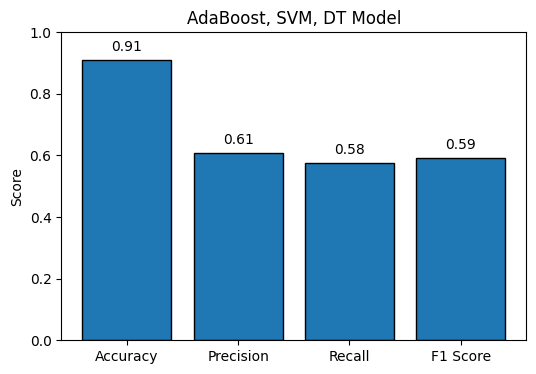

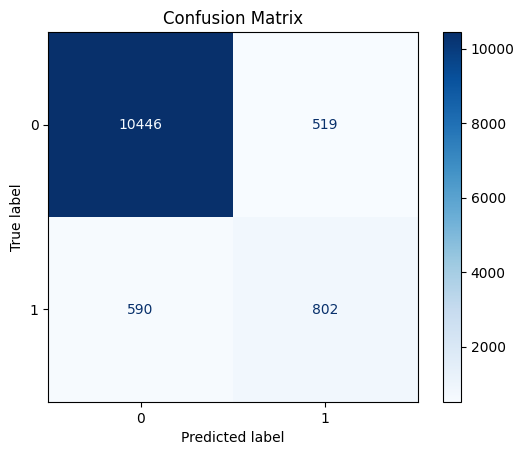

Accuracy: 0.9103
Recall: 0.5761
Precision: 0.6071
F1 Score: 0.5912
Confusion Matrix: TN=10446, FP=519, FN=590, TP=802


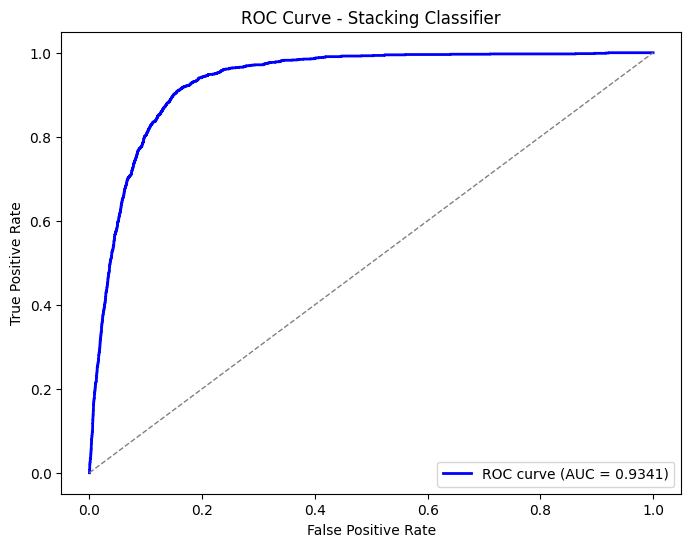

In [11]:
#Stacked optimized learner
from preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


X_resampled, X_test, y_resampled, y_test, encoders, scalers = preprocessing_pipeline(df)

#Base model init
base = [
    ('rf', RandomForestClassifier(max_features='sqrt', n_estimators=500, random_state=42)),
    ('gb', GradientBoostingClassifier(learning_rate=0.1, max_depth=9, n_estimators=1000, random_state=42)),
    ('svm', SVC(C=100, gamma=0.1, kernel='rbf', random_state=42))
]

#Stacking classifier
stack = StackingClassifier(
    estimators=base,
    final_estimator=LogisticRegression(max_iter=100, random_state=42),
    cv=cv_5fold(),
    n_jobs=-1,
)

stack.fit(X_resampled, y_resampled)

y_pred = stack.predict(X_test)
y_pred_proba = stack.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}

plt.figure(figsize=(6,4))
bars = plt.bar(metrics.keys(), metrics.values(), edgecolor='black')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('AdaBoost, SVM, DT Model')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc="lower right")
plt.show()

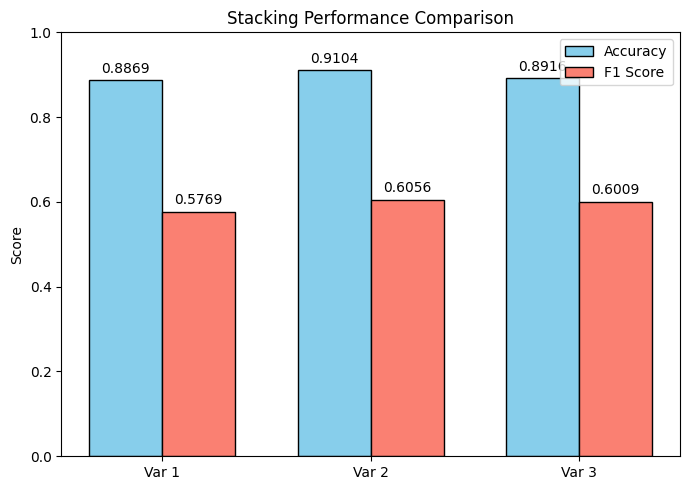

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the two variants
variants = ['Var 1', 'Var 2', 'Var 3']
accuracy = [0.8869, 0.9104, 0.8916]
f1_score = [0.5769, 0.6056, 0.6009]

x = np.arange(len(variants))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(7, 5))
bars1 = plt.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue', edgecolor='black')
bars2 = plt.bar(x + width/2, f1_score, width, label='F1 Score', color='salmon', edgecolor='black')

plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Stacking Performance Comparison')
plt.xticks(x, variants)
plt.legend()

# Add value labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()